# Logistic Regression

Logistic regression is a statistical technique that aims to produce a model that allows the prediction of values taken by a categorical variable (often binary) from a series of continuous explanatory variables and / or binary. Logistic regression is widely used in medical and social sciences, and has other denominations such as logistic model, logit model, and maximum entropy classifier. (Text from [Wikipedia](https://pt.wikipedia.org/wiki/Regress%C3%A3o_log%C3%ADstica) - Portuguese)
In this repository, we will use data from Coursera's course [Machine Learning](https://www.coursera.org/learn/machine-learning/) (Professor Andrew Ng from Stanford University), as well as follow the development steps of code and theory proposed by the course itself. However, python will be the programming language used, with the purpose of exercising the development of linear regression in another language, as well as discussing other possible paths that python libraries enable

## First Exercise

These are two exercises proposed. The first **(ex1)**: Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

## Importing the python and created libraries

In [1]:
import numpy as np
import pandas as pd
import MLplot as pl # Plot Library created (Check the source code)
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

##  Importing and organazing dataset

Checking the dataset, there are three columns. The first column is the first exam score. The second column is the second exam score. Third collumn is the categorical binary variable (which classifies whether the student has been approved or not)

In [2]:
# Path do the Dataset
pathtodata = 'Exercise_Data/ex1_Data.txt'

# Importing the dataset as dataframe
data = pd.read_csv(pathtodata,delimiter = ',',header=None)

# Setting the header index for the features
data.columns = ["Exam_1","Exam_2","Result"]

## Plotting classification data

For The classification plot in 2D has three parameters: _**data**_ , _**colbin**_ and _**colref**_.The _**colbin**_ is the collumn with the binary classification (0 0r 1) for the  _**data**_ parameter. the _**colref**_ is refenrece collumn for plot (y axis). The data visualization is important to give the overview of the sample, helping us to make better decisions in the development to code.

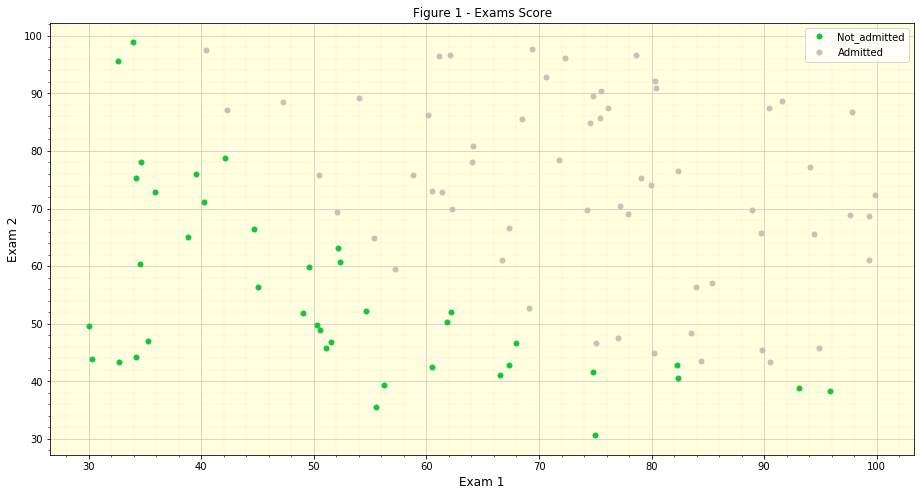

In [3]:
#Function return fig and axe object (from matplotlib) - MLplot.
dataPlot,axes = pl.plotClassifier2D(data,2,1)
axes.set_xlabel('Exam 1',fontsize=12)
axes.set_ylabel('Exam 2',fontsize=12)
axes.legend(loc='best',frameon= True, fancybox = True)
axes.set_title('Figure 1 - Exams Score',fontsize=12);

## The Sigmoid Function

The sigmoid functions (also known as logistic funtion) is represented in the **Equation 1** and has the characteristc of "S"-shaped curve (**Figure 2**). The function was named by [Pierre François Verhulst](https://en.wikipedia.org/wiki/Pierre_Fran%C3%A7ois_Verhulst) in his publication: _**Loi D'Accroissement de la population**_ or **Law of Population Growth**.

$$g(z) = \frac{1}{1+e^{-z}} \quad\quad (1)$$

This function is interesting for binary classification. In **Figure 2** $g(z)$ **rapidaly** increase for  1  or **rapidaly** decrease for 0 when $g(z)$ is different from 0.5. Which means that , for most of $z$ values, $g(z)$ is close to one or zero.

In [4]:
def sigmoid(z):
    
    g = 1/(1+(np.exp(-z)))

    return g

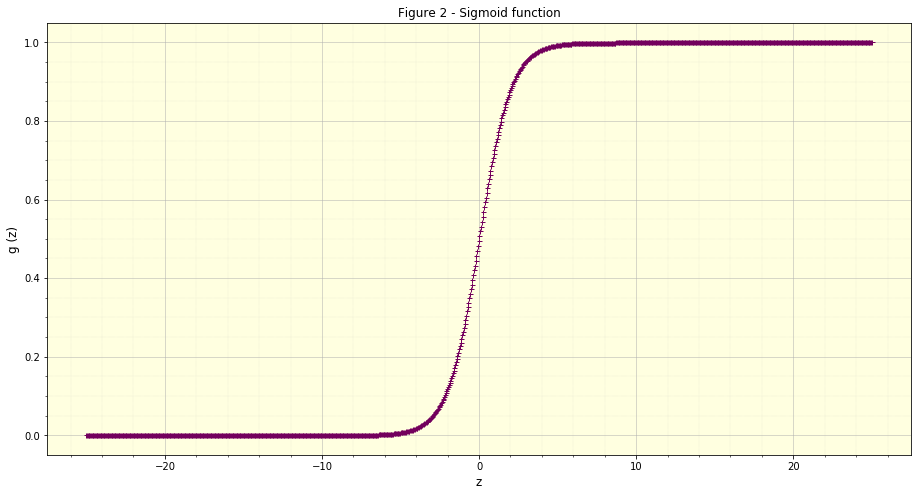

In [5]:
# Plotting the sigmoid function
z = np.linspace(-25,25,1000)
sig = sigmoid(z)
sigplot = pl.plot2D(z,sig)
sigplot.set_ylabel(r'g (z)',fontsize=12)
sigplot.set_xlabel(r'z',fontsize=12)
sigplot.set_title('Figure 2 - Sigmoid function');

where $z =\theta^T x$ and $h_\theta(x)$ is:

$$h_\theta(x)=g(z)=g(\theta^T x)\quad\quad (2)$$

Important know that the choice of the hypothesis will give the boundary decision for predict the variable (y = 1 or y = 0). For instance, let's set the value of $\theta$ for a linear boundary decision as bellow:

$$z = (-3)x_0 + (1)x_1 + (0)x_2 \quad\quad (3)$$

Setting the conditions for **boundary decision**: if the hypothesis value is higher than zero, y = 1 and if hypothesis is lower or equal to zero, y = 0. Feel free to test different values of $\theta_0$,  $\theta_1$ and  $\theta_2$ to check different linear boundary decisions.

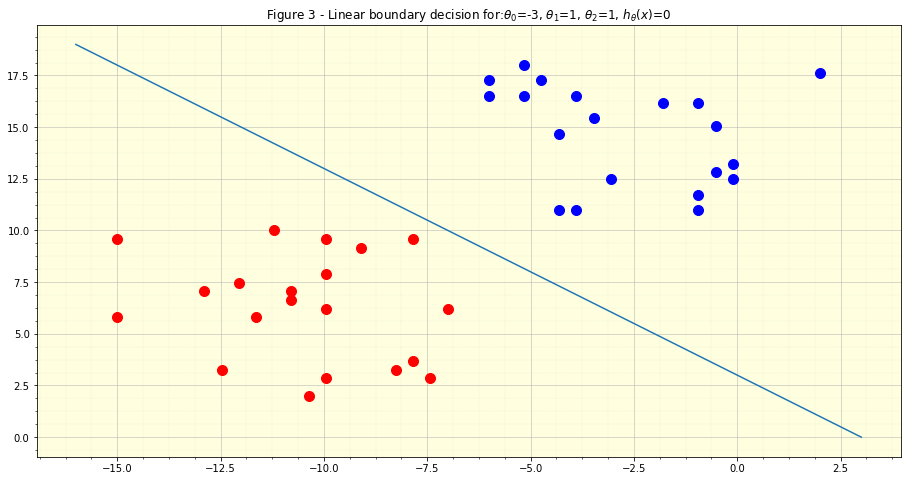

In [6]:
import ex1Boundary as bd

theta_0, theta_1, theta_2, hip   = -3, 1, 1, 0

ex1bdplot = bd.exBound(theta_0,theta_1,theta_2,hip) 
ex1bdplot.set_title("Figure 3 - Linear boundary decision for:" r'$\theta_0$={0}, $\theta_1$={1}, $\theta_2$={2}, $h_\theta(x)$={3}'.format(theta_0,theta_1,theta_2,hip));

## Cost Function for Logistic Regression

The cost function (J) or loss function represents the distance of its hypothesis with the real data. In linear regression, the cost function was also implemented using the equation bellow:

$$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2=\frac{1}{2m}\sum_{i=1}^{m}Cost(h_\theta (x) ,y)\quad\quad (4)$$

For logistic regression, the equation above is no longer the best choice for compute the cost function. Since the hypothesis for logistic regression is a non-liner function (sigmoid function), if it is computed the cost function for diferent values of theta, it will result in a _**non-convex**_ function (with many local optima). the non-convex function has high probability to **not** converge in a global minimum when gradient descent is applied. **Figure 3** shows the difference between non-convex function and convex function.

<html>
<p>
<p>
<body>
    <div align="center">
        <img src="Images/Nonconvex_func.png" 
        width = "700" /><p>
    </div>
</body>
<body>
    <div align="center">
   Figure 4 - Non-convex function and convex function<p>
    </div>
    <p>
    <p>
</body>
</html>


In order to avoid the non convergence of the cost function, it is necessary adpat the previous **Equation 4** to a new one. A interesting choice is use logarithm function as shown bellow:

$$
Cost(h_\theta (x) ,y)=
  \begin{cases} 
   -log{(h_\theta (x))} & \text{if } y=1\\
   -log{(1-h_\theta (x))} & \text{if }y=0
  \end{cases}
$$


Following the conditions above, the idea in use logarithm function is:

- when the training set (y) is equal to 1 and $h_\theta (x)$ = 1, $Cost(h_\theta (x) ,y)=0$ (which is a reward)
- when the training set (y) is equal to 1 and $h_\theta (x)$ = 0, $Cost(h_\theta (x) ,y)=\infty$ (which is a penalty)
- when the training set (y) is equal to 0 and $h_\theta (x)$ = 0, $Cost(h_\theta (x) ,y)=0$ (which is a reward)
- when the training set (y) is equal to 0 and $h_\theta (x)$ = 1, $Cost(h_\theta (x) ,y)=\infty$ (which is a penalty)

Use these conditions, the algorithm will understand the most probably path to choose and then, converge the cost function for the global minimum. We can write the cost function in a more general form as **Equation 5**

$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]\quad\quad (5)$$

Or in a vectorized form **Equation 6**:

$$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)\quad\quad (6)$$

In [7]:
def computeCost(theta,x,y):
    
    # Hypothesis function g(X*Theta)
    hip = sigmoid(x.dot(theta))
    
    # The final cost Function
    J = -1*(1/len(y))*(np.log(hip).T.dot(y)+np.log(1-hip).T.dot(1-y))
    
    return float(J)

## Gradient descent for logistic regression

The gradient descent in logistic regression has similar implementation compared to [linear regression](https://github.com/gsoumoreira/LinearRegression_Python) as shown in **Equation 7**. However, the hypothesis is no longer represented by a linear function. Instead, the sigmoid function is used.

$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j}\quad\quad (7) $$

Also, as it was done in cost function, gradient descent can be vectorized **(Equation 8)**:

$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)\quad\quad (8)$$

In [8]:
def gradientDescent(x, y, theta, alpha, num_iters):
    
    # Jhist variable creation
    Jhist = np.zeros([num_iters,1])
    
    # thetahist variable creation
    thetahist = np.zeros([num_iters,x.shape[1]])
    
    # Gradiante descent for iterations 
    for i in range(num_iters):

        # Compute the gradient descent(.T = transpose and .dot = matrix multiplication)
        theta =  theta - ((alpha/len(y)) * x.T.dot(sigmoid(x.dot(theta))-y))
    
        # Compute the theta history
        thetahist[i] = theta.T
    
        # Cost function History
        Jhist[i] = computeCost(theta,x,y)
    
    return [theta,Jhist,thetahist]

## Important notes about update theta using gradient descent in

Since we are handle with logarathim and exponential equations, compute some values might give undesirable error. For instance: $log (0) = \infty$. Alpha is quite sensitve for this exercise. After many attempts, I find out that $\alpha\approx 0.001$ seems appropriate choice for converge the cost function. Moreover, it is important to note that this technique needs many iteractions, which depending of your machine, might result in a slow convergence. After one million iteractions, still, theta values did not achieve the optimum value (Even it is close from the optimum point, as shown the cost function plot - **Figure 5**). In fact, there are alternatives functions in python which is more efficient and faster, as it will be shown in the next part.

In [9]:
# Selecting x and y correlation features
y = data[["Result"]]
x = data[["Exam_1","Exam_2"]]

# Inserting the first column X0 with the ones
x.insert(loc=0, column='X0', value=np.ones(len(y)))

# .values = get the numpy array from DataFrame
x_val,y_val = x.values, y.values

# Initial guess for theta parameter 
theta = np.zeros([x_val.shape[1],1])

# Variables for gradient descent (alpha = learning rate) 
num_iters, alpha = 1000000, 0.001

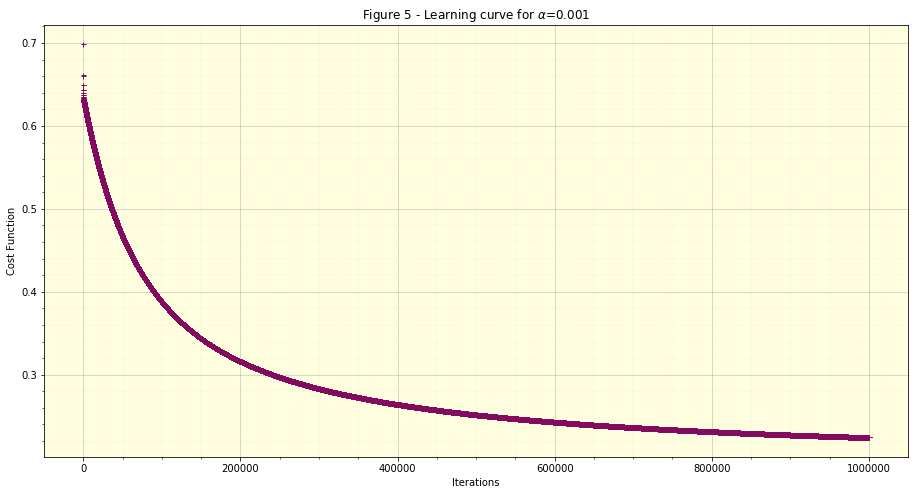

In [11]:
# List witn the number of iterations
iterations = list(range(num_iters))
[besthip0,Jhist,thetahist] = gradientDescent(x_val, y_val, theta, alpha, num_iters)
Leacur_plot = pl.plot2D(iterations,Jhist)
Leacur_plot.set_title(r'Figure 5 - Learning curve for $\alpha$={0}'.format(alpha))
Leacur_plot.set_xlabel('Iterations')
Leacur_plot.set_ylabel('Cost Function');

## The *minimize()*  function

Minimize function from [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) package provides several commonly used optimization algorithms. Feel free to test different methods and dive into numerical calculus. In this exercise, it was chosen the [Truncated Newton Algorithm (TNA)](https://en.wikipedia.org/wiki/Truncated_Newton_method) (The link provides the wikipedia article). It turns out that others methods also converge quite well, and even if there is no method input in the function, still it works well. In gradient descent, the optimum theta value after one million updates was _[-15.39, 0.12, 0.12]_, which will result in a cost function around 0.22. Using _minimize()_ the optimum theta results in _[-25,16, 0.20, 0.20]_, which will result in a cost function around 0.20.

In [13]:
# Partial derivative of the cost function for the minimize() argument jac
def gradient(theta, x, y):
    
    grad =(1/len(y))*x.T.dot(sigmoid(x.dot(theta.reshape(-1,1)))-y)

    # The flatten transform the grad two dimension array in one dimension array
    return grad.flatten()

In [14]:
# Must be array with one dimension to compute in minimize()!
initial_theta = np.zeros([x_val.shape[1]])

from scipy.optimize import minimize

# computeCostReg must return a float and the parameter to be optimizer must be
# 1D array (initial_theta ) and also must be the first arugment
# computeCostReg(theta,....)
besthip1 = minimize(computeCost, initial_theta, args=(x_val,y_val), method='TNC', jac=gradient)

## Evaluating logistic regression

After learning the parameters using _**gradientDescentReg()**_ and _**minimize()**_, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of **68.7%** and **77.6%** respectivily. Since in _**minimize()**_ gives better convergence, it will be used for plot the boundary descision. In order to get our discrete 0 or 1 classification, we can translate the output of the hypothesis function as follows:

$$
  \begin {cases}
   h_\theta (x) \geq 0.5 --> y=1 \quad\quad\text{Admitted}\\
   h_\theta (x) < 0.5 --> y=0  \quad\quad\text{Not admitted}
  \end{cases}
$$



In [15]:
# Student with Exam 1 score 45 and Exam 2 score 85 - Probabity if he is addmited
# using gradient descent and minimize() function
prob0 = sigmoid(np.array([1, 45, 85]).dot(besthip0)); # 68.7%
prob1 = sigmoid(np.array([1, 45, 85]).dot(besthip1.x.T)); # 77.6%

# Setting the boundary decision plot 
hip, x_b0, x_b1 = 0, 1, np.array([x.min()[2], x.max()[2]])
x_b2 = (-1/besthip1.x[2])*((x_b0*besthip1.x[0]) + (x_b1*besthip1.x[1]) - hip)

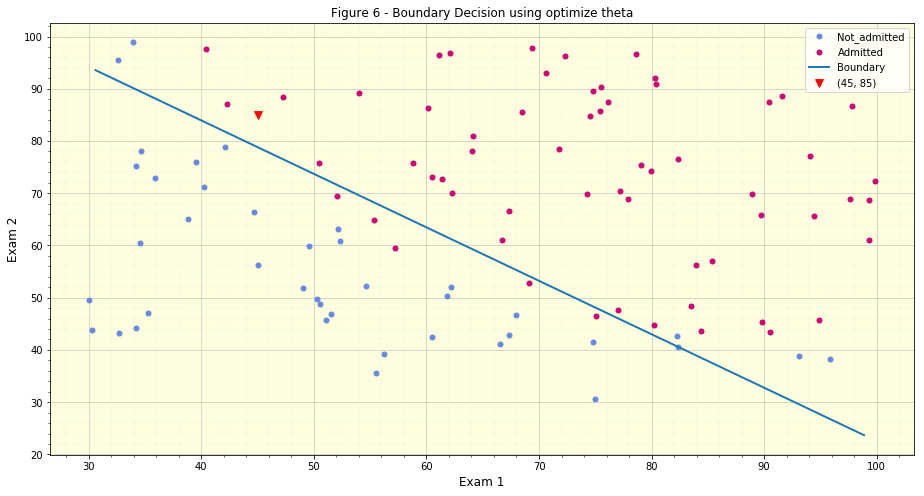

In [17]:
import matplotlib.pyplot as plt

# DataPlot
dataPlot1,axes1 = pl.plotClassifier2D(data,2,1)
axes1.set_xlabel('Exam 1',fontsize=12)
axes1.set_ylabel('Exam 2',fontsize=12)
axes1.set_title('Figure 6 - Boundary Decision using optimize theta',fontsize=12)

# Sttudent with 45 and 85 score
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')

# Decision boundary plot
plt.plot(x_b1,x_b2, linewidth=2, label='Boundary')
axes1.legend(loc='best',frameon= True, fancybox = True);

## Regularized logistic regression


## Second exercise

Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.

**Figure 7** shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight- forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary. However, we should also concern about **overfitting problem**.

##  Importing and organazing dataset  (ex 2)

Checking the dataset2, there are three columns. The first column is the first test score. The second column is the second test score. Third collumn is the categorical binary variable (which classifies whether the microship has been approved or not)

In [18]:
# Path do the Dataset
pathtodata2 = 'Exercise_Data/ex2_Data.txt'

# Importing the dataset as dataframe
data2 = pd.read_csv(pathtodata2,delimiter = ',',header=None)

# Setting the header index for the features
data2.columns = ["Test_1","Test_2","Result"]

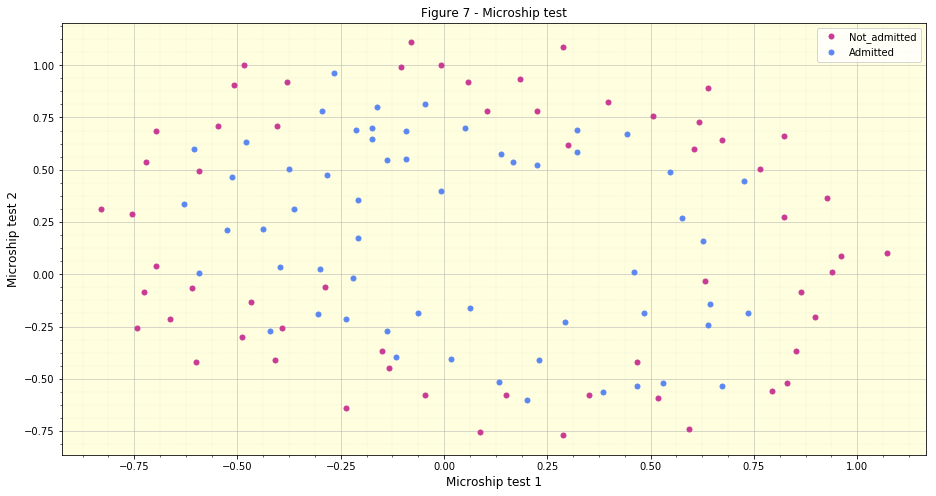

In [19]:
# Plotting classification data
dataPlot2,axes2 = pl.plotClassifier2D(data2,2,1)
axes2.set_xlabel('Microship test 1',fontsize=12)
axes2.set_ylabel('Microship test 2',fontsize=12)
axes2.legend(loc='best',frameon= True, fancybox = True)
axes2.set_title('Figure 7 - Microship test',fontsize=12);

## Feature mapping



In [42]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
XX = poly.fit_transform(data2.iloc[:,0:2])

#### Regularized Cost Function
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$
#### Vectorized Cost Function
#### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big) + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$

In [43]:
def compureCostReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [44]:
XX

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01,
         2.62830529e-03,  3.58643425e-02,  4.89384194e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01,
         8.60107856e-03, -6.35227055e-02,  4.69142804e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01,
         4.56719641e-02, -1.47940747e-01,  4.79210063e-01],
       [ 1.00000000e+00, -3.75000000e-01,  5.02190000e-01,
         1.40625000e-01, -1.88321250e-01,  2.52194796e-01],
       [ 1.00000000e+00, -5.13250000e-01,  4.65640000e-01,
         2.63425562e-01, -2.38989730e-01,  2.16820610e-01],
       [ 1.00000000e+00, -5.24770000e-01,  2.09800000e-01,
         2.75383553e-01, -1.10096746e-01,  4.40160400e-02],
       [ 1.00000000e+00, -3.98040000e-01,  3.43570000e-02,
         1.58435842e-01, -1.36754603e-02,  1.18040345e-03],
       [ 1.00000000e+00, -3.05880000e-01, -1.92250000e-01,
         9.35625744e-02,  5.88054300e-02,  3.69600625e-02],
       [ 1.00000000e+00,  1.67050000e-02, -4.042